In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import missingno as mn
import math

# Visualization libs
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.hls_palette(8, l=0.7, s=.8)
sns.set(rc={"figure.figsize": (6, 6)}, palette=palette)
sns.set_style('white')

Получите значения AUC для различных моделей и их параметров.

Попробуйте построить модель с значением AUC лучше, чем в примерах на занятии

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

Импортируем модели, на которых будем тестировать:

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [5]:
df = pd.read_csv('./adult.csv')

Подготавливаем данные:

In [6]:
num_features = ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
cat_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'native-country', 'gender', 'race']
columns_to_select = num_features + cat_features
X = pd.get_dummies(df[columns_to_select], cat_features)

income = LabelEncoder()
income.fit(df.income)
y = pd.Series(income.transform(df.income))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
samples = { 'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test }

In [8]:
def calc_auc_for_model(model, X_train, y_train, X_test, y_test):
    """
    Trains model and calculates TPR and FPR on test values
    """
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thres = roc_curve(y_test, y_pred)
    return (fpr, tpr)

Создадим модели для обучения:

In [9]:
models = [
    ("LogisticRegression", LogisticRegression()),
    ("XGBClassifier", XGBClassifier()),
    ("RandomForestClassifier", RandomForestClassifier(max_depth=5)),
    ("DecisionTreeClassifier", DecisionTreeClassifier(max_depth=5))
]

AUC for LogisticRegression: 0.9081394792337413
AUC for XGBClassifier: 0.9228232998660717
AUC for RandomForestClassifier: 0.8950801453292121
AUC for DecisionTreeClassifier: 0.8870865026230363


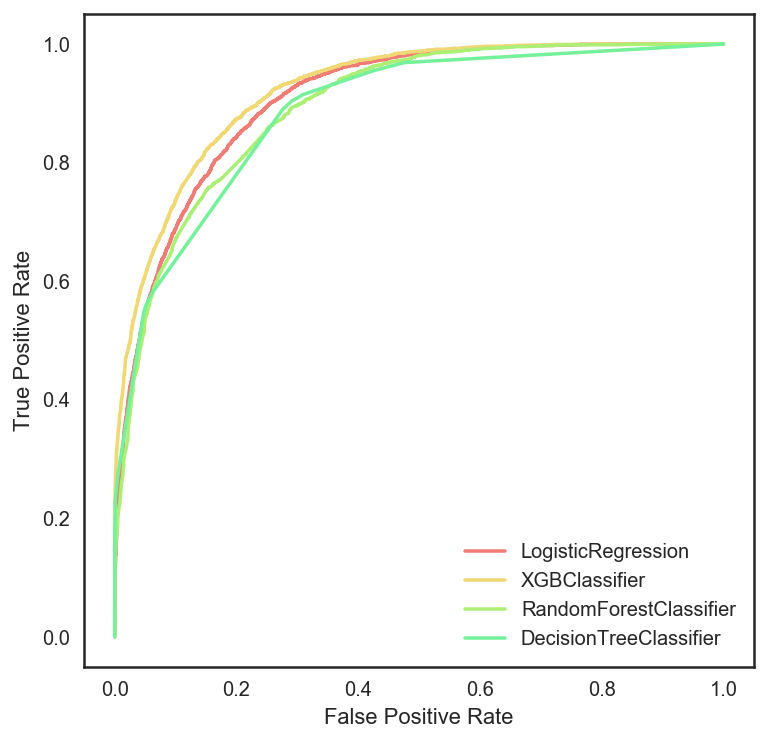

In [10]:
for label, model in models:
    fpr, tpr = calc_auc_for_model(model, **samples)
    print("AUC for {}: {}".format(label, auc(fpr, tpr)))
    plt.plot(fpr, tpr, label=label)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend( loc = 0 )
plt.show()